In [5]:
from project_imports import *


In [6]:
# Log into the Wharton database
conn = wrds.Connection(wrds_username='bjarki')

Loading library list...
Done


In [7]:
# Setting start and end date for the data
start_date = "01/01/2020"
end_date = "12/31/2022"

In [12]:
import importlib
import functions

# Reload the module
importlib.reload(functions)

sp500 = functions.load_sp500_data(conn, start_date, end_date)


In [10]:
# Reload the module
importlib.reload(functions)

ff5 = functions.load_ff5_data(conn, start_date, end_date)

In [6]:
import os
import zipfile
from tempfile import TemporaryDirectory

# Path to the ZIP file
zip_path = "../Data/PredictorsIndiv.zip"

# Get a unique list of PERMNOs from the CRSP data
permno_unique = sp500.permno.unique()

# Temporary directory to extract files
with TemporaryDirectory() as temp_dir:
    # Open the ZIP file
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        # Extract all files to the temporary directory
        zip_ref.extractall(temp_dir)
        
        # Get a list of CSV files in the directory (assuming all files are CSVs)
        csv_files = [f for f in os.listdir(temp_dir) if f.endswith('.csv')]
        
        # Ensure we only process the first 5 CSV files
        # csv_files = csv_files[:5]
        
        # Initialize an empty DataFrame for the combined data
        combined_df = None
        
        # Iterate over the CSV files
        for csv_file in csv_files:
            df = pd.read_csv(os.path.join(temp_dir, csv_file))

            # Filter the dataframe to include only rows with 'permno' in permno_unique
            df = df[df['permno'].isin(permno_unique)]
            
            # If combined_df is not yet initialized, use the first dataframe
            if combined_df is None:
                combined_df = df
            else:
                # Merge the current dataframe with the combined dataframe on 'permno' and 'yyyymm'
                combined_df = pd.merge(combined_df, df, on=['permno', 'yyyymm'], how='outer')
        
        # Optional: Save the combined dataframe to a new CSV file
        # combined_df.to_csv("../Data/combined_csv.csv", index=False)
        
        print("Combined CSV file created successfully.")

Combined CSV file created successfully.


In [10]:
one_comp = combined_df[combined_df['permno'] == permno_unique[0]]

In [60]:
sp500_full[sp500_full['permno'] == permno_unique[36]].head()

,permno,start,ending,date,prc,openprc,ret,askhi,bidlo,vol,shrout,comnam,ncusip,namedt,nameendt,shrcd,exchcd,hsiccd,ticker
3002,59328,1976-12-09,2023-12-29,2020-01-02,60.84,60.24,0.016541,60.970,60.22,17685088.0,4290000.0,INTEL CORP,45814010,2004-06-10,2023-12-29,11,3,3679,INTC
6458,59328,1976-12-09,2023-12-29,2020-01-03,60.10,59.81,-0.012163,60.700,59.81,15280638.0,4290000.0,INTEL CORP,45814010,2004-06-10,2023-12-29,11,3,3679,INTC
10881,59328,1976-12-09,2023-12-29,2020-01-06,59.93,59.59,-0.002829,60.195,59.33,17739057.0,4290000.0,INTEL CORP,45814010,2004-06-10,2023-12-29,11,3,3679,INTC
11238,59328,1976-12-09,2023-12-29,2020-01-07,58.93,59.78,-0.016686,59.800,58.89,21935685.0,4290000.0,INTEL CORP,45814010,2004-06-10,2023-12-29,11,3,3679,INTC
15999,59328,1976-12-09,2023-12-29,2020-01-08,58.97,58.89,0.000679,59.320,58.52,23090282.0,4290000.0,INTEL CORP,45814010,2004-06-10,2023-12-29,11,3,3679,INTC


# Testing generating graphs, using the Apple stock first

In [13]:
dfApple = sp500[sp500.permno == 14593]

# Clear memory
sp500 = []
# sp500_full = []
# mse = []

In [491]:
# Only keep the columns we need
df = dfApple[['date', 'prc', 'openprc', 'askhi', 'bidlo', 'vol', 'ret5', 'ret20', 'ret60']].copy()

# Keep the permno
permno = dfApple['permno'].unique()

# Rename columns
df.columns = ['Date', 'Close', 'Open', 'High', 'Low', 'Volume', 'Ret5', 'Ret20', 'Ret60']

# Add 20 day moving average
indicator = {'MA': 20}

# Define number of days to look back at, as input
lookback = 60

# # Define the image size, as each day needs to be represented by 3 pixels
# if lookback == 5:
#     image_size = (32, 15)
# elif lookback == 20:
#     image_size = (64, 60)
# elif lookback == 60:
#     image_size = (96, 180)

# Whether to show volume in images
show_volume = True

# Define the mode that we are in
mode = 'train'

In [500]:
import generate_graphs

# Reload the module
importlib.reload(generate_graphs)

# Generate the images
image_set = generate_graphs.image_generator(df, image_size, lookback, indicator, show_volume, mode)

In [502]:
# Print invalid dates
image_set[2]

[]

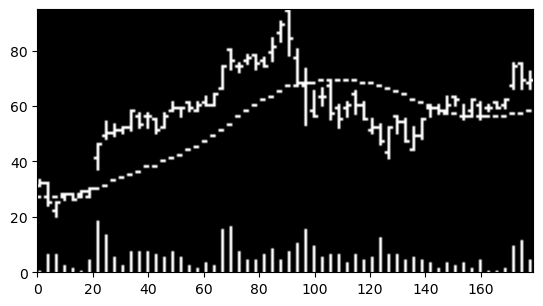

In [503]:
generate_graphs.show_single_graph(image_set[0][120])

In [455]:
# from zipfile import ZipFile

# with ZipFile('C:/Users/bjark/Downloads/tabularDf.zip', 'r') as z:
#     f =  z.open('tabularDf.csv')
#     tabularDf = pd.read_csv(f, index_col=0)
#     f.close()
#     z.close()

In [15]:
# Only keep the columns we need
df = dfApple[['date', 'prc', 'openprc', 'askhi', 'bidlo', 'vol', 'ret5', 'ret20', 'ret60']].copy()

# Keep the permno
permno = dfApple['permno'].unique()

# Rename columns
df.columns = ['Date', 'Close', 'Open', 'High', 'Low', 'Volume', 'Ret5', 'Ret20', 'Ret60']

In [36]:
import generate_graphs

# Reload the module
importlib.reload(generate_graphs)

# (self, df, win_size, mode, label, indicator = [], show_volume=False, parallel_num=-1)

# Get out the dataset
dataset = generate_graphs.GraphDataset(df = df, win_size=5, mode='train', label='Ret5', indicator = [{'MA': 20}], show_volume=True, parallel_num=-1)

In [37]:
# Generate the image set
image_set = dataset.generate_images()

Generating Images: 100%|██████████| 1/1 [00:00<00:00, 194.09it/s]


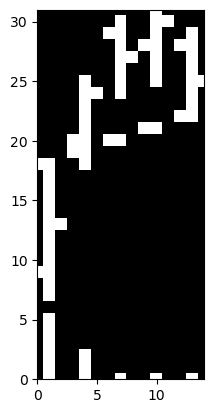

In [42]:
generate_graphs.show_single_graph(image_set[0][0][2])

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Simulate an image matrix (32x15)
image_matrix = np.random.randint(0, 256, (32, 15), dtype=np.uint8)

# Save the matrix as a PNG file
plt.imsave('image_matrix.png', image_matrix, cmap='gray', format='png')


In [2]:
from PIL import Image
import numpy as np

# Load the image back
loaded_image = Image.open('image_matrix.png').convert('L')

# Convert to a NumPy array
loaded_image_matrix = np.array(loaded_image)

# Verify precision
print("Original matrix:")
print(image_matrix)
print("\nLoaded matrix:")
print(loaded_image_matrix)
print("\nDifference:", np.sum(np.abs(image_matrix - loaded_image_matrix)))


Original matrix:
[[ 63  91 120 131 206 143 178  73 244 251 214 162  84 189 191]
 [126 238 114  32  60  93  67 246 172 160 105 137 240 180  42]
 [109 235 233  73  29  93 166 132  93  74   8  93 123 255  57]
 [252 106 155 252   8 181  26  52 143 167 164  69 220 212 154]
 [194 240 101 188 191 126 208  97 178 152 171 243 146 208  64]
 [181 165   2  89   2  31 186 184 128 130 209 235  95 118  75]
 [234 153 223  66 201 246 150  45 141 159  54  44  93  77 126]
 [112  17 144 204  64 156  79 209 157 109 180 164 224  83  32]
 [237 103 235 118 182 249  93 141 170 198 127  17 195 191 117]
 [209  70 119 221  16  81 131  15 198 192 169 194 200 240 211]
 [196 182 241  98  18 172 136  96 149 132  28 129 102 229 128]
 [193   8 103 210 103  53 175 227  96 206 185 255 119 250 126]
 [239 160 144 232 167 207 150 135  36 141 185 124 121 173 220]
 [ 39 114   7 227   1 131 240 104  46 214 183 126 240 228  48]
 [155 107  92 161  76 139  51 203 205 254 213 243  65 194 120]
 [ 57 117 118  97  32 121 130   1  44 

In [3]:
from PIL import Image
import numpy as np

# Simulate an image matrix (32x15)
image_matrix = np.random.randint(0, 256, (32, 15), dtype=np.uint8)

# Convert the matrix to a PIL image
image = Image.fromarray(image_matrix)

# Save the image as a PNG file
image.save('image_matrix.png', format='png')

# Load the image back
loaded_image = Image.open('image_matrix.png')

# Convert to a NumPy array
loaded_image_matrix = np.array(loaded_image)

# Verify precision
print("Difference:", np.sum(np.abs(image_matrix - loaded_image_matrix)))


Difference: 0


In [4]:
from PIL import Image
import numpy as np

# Original image matrix (32x15)
image_matrix = np.random.randint(0, 256, (32, 15), dtype=np.uint8)

# Convert the matrix to a PIL image
original_image = Image.fromarray(image_matrix)

# Save the original image
original_image.save('original_image.png', format='png')

# Scale up for visualization
scale_factor = 20
larger_image = original_image.resize((original_image.width * scale_factor, original_image.height * scale_factor), Image.NEAREST)

# Save the larger image for visualization
larger_image.save('larger_image.png', format='png')


In [5]:
from PIL import Image
import numpy as np

# Load the original image back
loaded_original_image = Image.open('original_image.png').convert('L')

# Convert to a NumPy array
loaded_original_matrix = np.array(loaded_original_image)

# Assuming `image_matrix` is your original matrix
print("Difference:", np.sum(np.abs(image_matrix - loaded_original_matrix)))


Difference: 0
